In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.170091377191, cross=0.167313827004
3600: Fitting... Scoring... Calc.err... train=0.168739656126, cross=0.166395245319
10800: Fitting... Scoring... Calc.err... train=0.154285301597, cross=0.150552660219
21600: Fitting... Scoring... Calc.err... train=0.13687701148, cross=0.135202042011
43200: Fitting... Scoring... Calc.err... train=0.127702575281, cross=0.124673098261
86400: Fitting... Scoring... Calc.err... train=0.137558499462, cross=0.134405819255


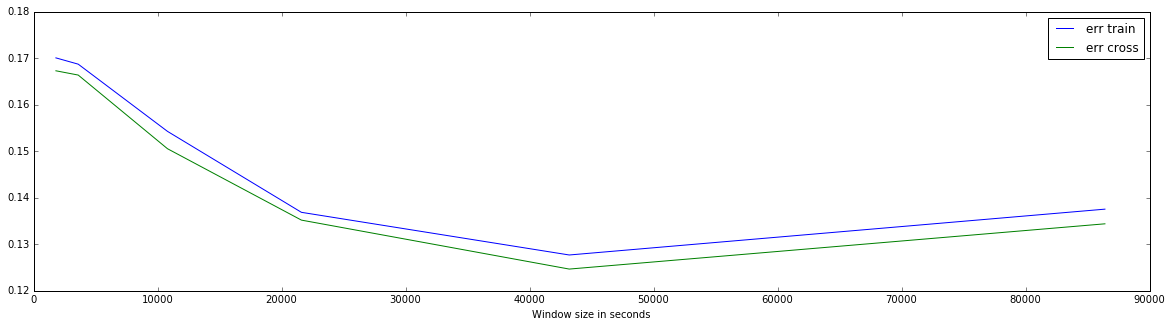

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.151328147487, cross=0.145807235972
3: Fitting... Scoring... Calc.err... train=0.131277935281, cross=0.128675509103
4: Fitting... Scoring... Calc.err... train=0.127702575281, cross=0.124673098261
5: Fitting... Scoring... Calc.err... train=0.127401692199, cross=0.124093071644
6: Fitting... Scoring... Calc.err... train=0.125939487462, cross=0.121769170201
7: Fitting... Scoring... Calc.err... train=0.126198044004, cross=0.122242986403
8: Fitting... Scoring... Calc.err... train=0.124866533468, cross=0.119809886384
9: Fitting... Scoring... Calc.err... train=0.172919967042, cross=0.170076858784


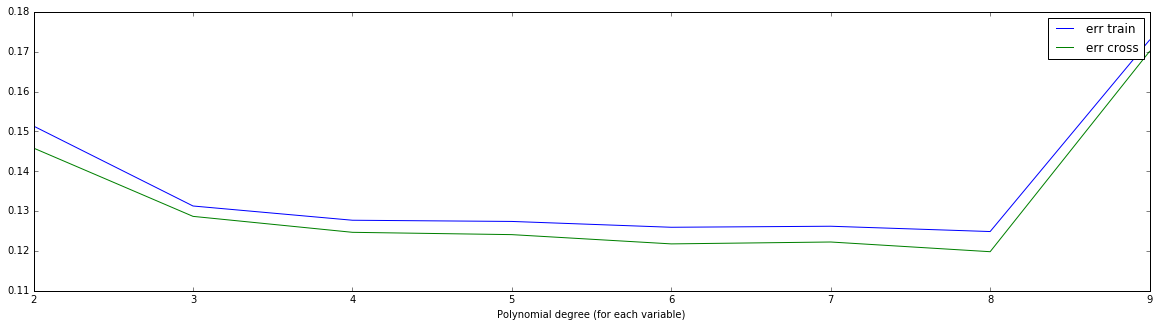

Evaluation using Alex' data:


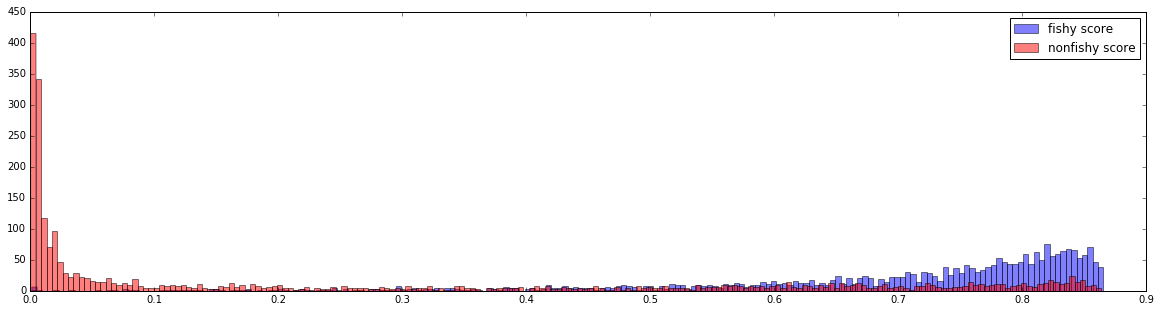

Squared numerical error: 0.13198000638
Error (overlap): 35.96%
False positives given cutoff at 0.5: 46.2123832584%


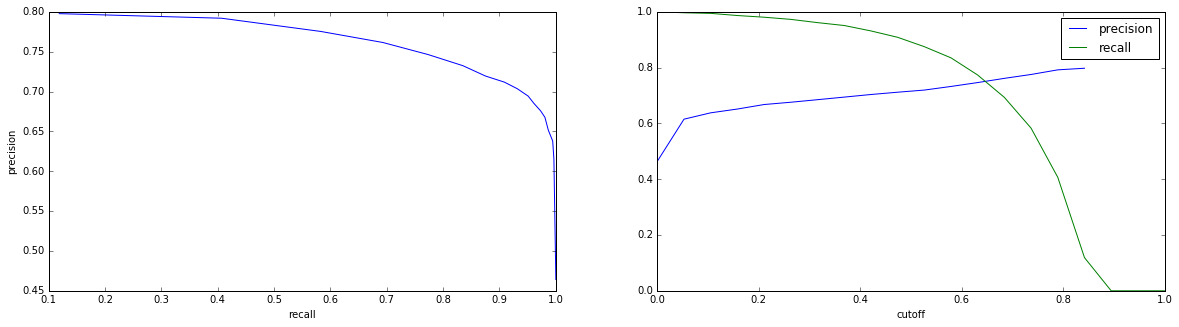

Score window: 43200
Score polynomial: [ -2.27984153 -12.56380969  19.51564219  20.20806935 -31.31310999
  -2.27984153 -19.64121557 -15.76779712  -4.47130881  -0.38590897
  -2.27984153  -1.95341767  -1.25592693   1.19234906   0.45937171]
Evaluate using Kristinas data:


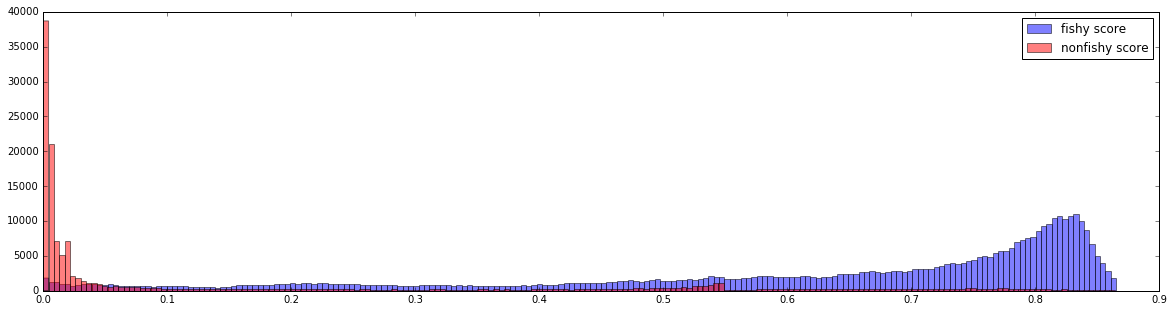

Squared numerical error: 0.1688228004
Error (overlap): 21.8502416138%
False positives given cutoff at 0.5: 13.631659525%


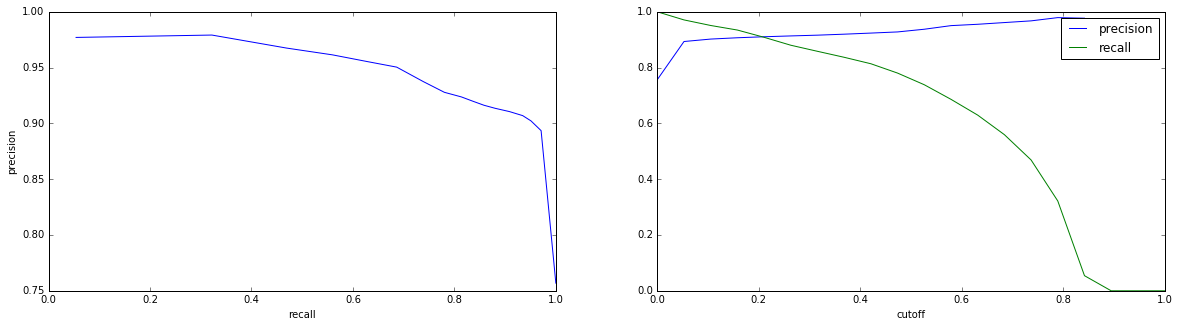

Score window: 43200
Score polynomial: [ -2.27984153 -12.56380969  19.51564219  20.20806935 -31.31310999
  -2.27984153 -19.64121557 -15.76779712  -4.47130881  -0.38590897
  -2.27984153  -1.95341767  -1.25592693   1.19234906   0.45937171]


In [4]:
x, xtrain, xcross, xtest = load_dataset('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.149244695748, cross=0.14055417817
3600: Fitting... Scoring... Calc.err... train=0.146321583616, cross=0.137598799835
10800: Fitting... Scoring... Calc.err... train=0.135222387084, cross=0.128108881693
21600: Fitting... Scoring... Calc.err... train=0.127218882581, cross=0.122859614656
43200: Fitting... Scoring... Calc.err... train=0.107818915447, cross=0.106935497757
86400: Fitting... Scoring... Calc.err... train=0.116673817724, cross=0.11313467793


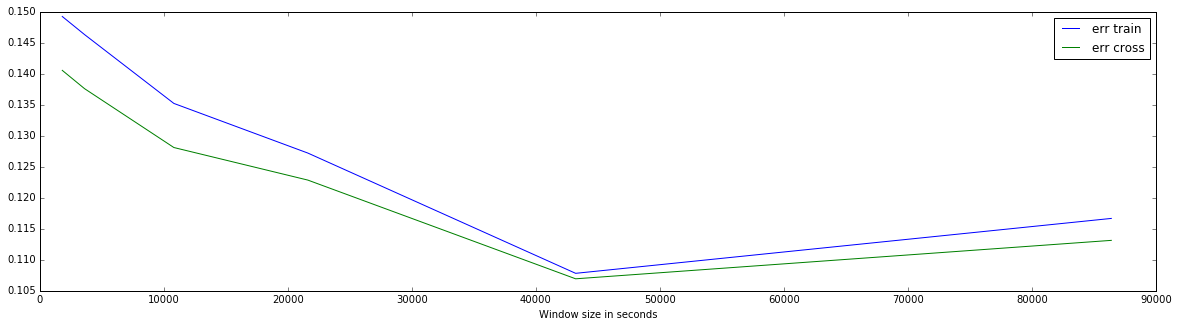

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.125574399811, cross=0.126941058835
3: Fitting... Scoring... Calc.err... train=0.125504695948, cross=0.127165909505
4: Fitting... Scoring... Calc.err... train=0.107818915447, cross=0.106935497757
5: Fitting... Scoring... Calc.err... train=0.103514924801, cross=0.102837193326
6: Fitting... Scoring... Calc.err... train=0.102325589018, cross=0.101434427399
7: Fitting... Scoring... Calc.err... train=0.102254126535, cross=0.101190489966
8: Fitting... Scoring... Calc.err... train=0.102589166089, cross=0.10140602397
9: Fitting... Scoring... Calc.err... train=0.156177572633, cross=0.164620886179


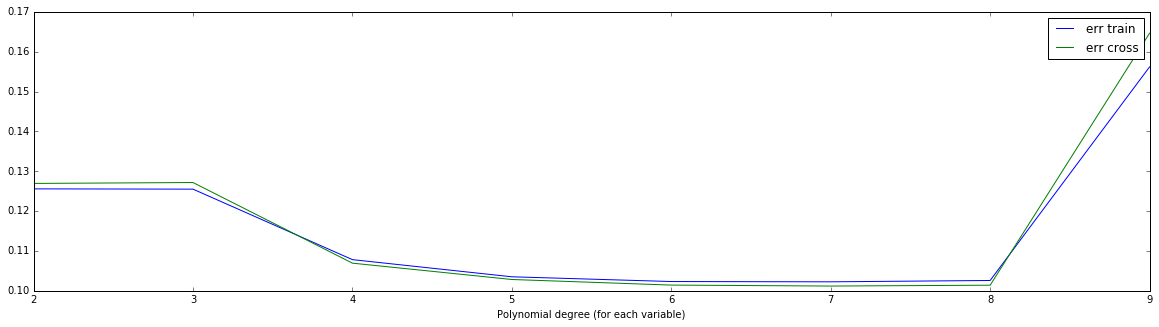

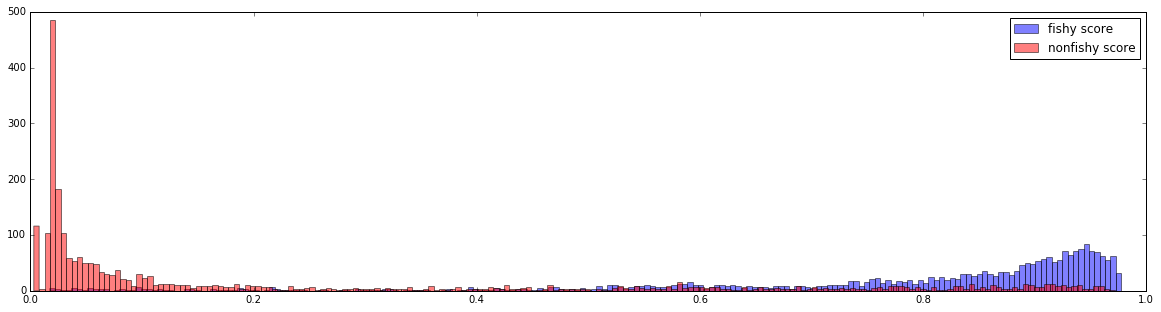

Squared numerical error: 0.112084512963
Error (overlap): 28.68%
False positives given cutoff at 0.5: 37.1725870111%


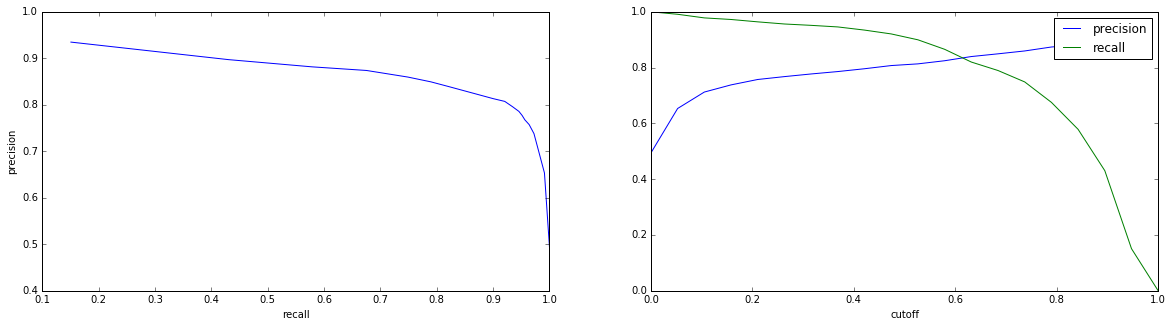

Score window: 43200
Score polynomial: [ -3.77574703e+00   2.53087102e+01  -1.26339501e+02   2.34463732e+02
  -1.34737714e+02  -3.77574703e+00  -3.29936293e+01  -3.26384277e+01
  -1.29451193e+01  -1.77461740e+00  -3.77574703e+00   1.84859456e+00
  -6.60630165e-01  -2.09171723e-01   2.08337126e-02]


In [3]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

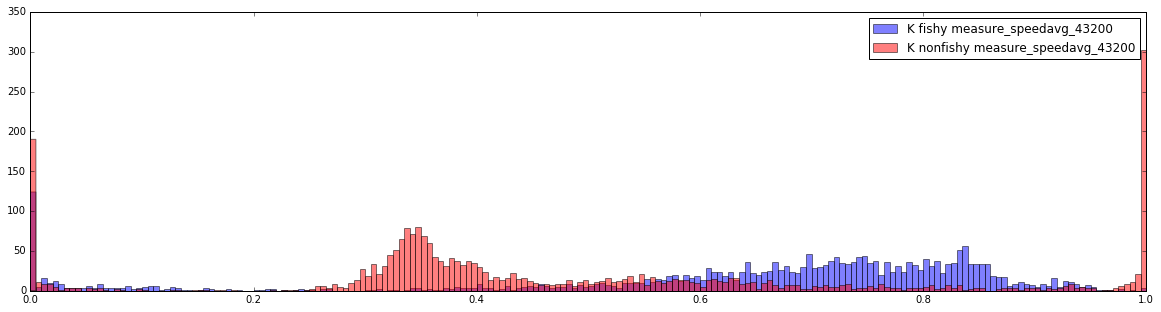

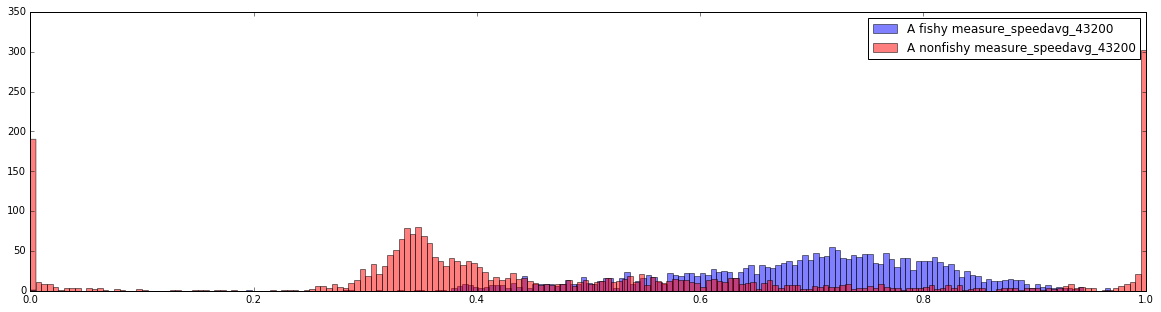

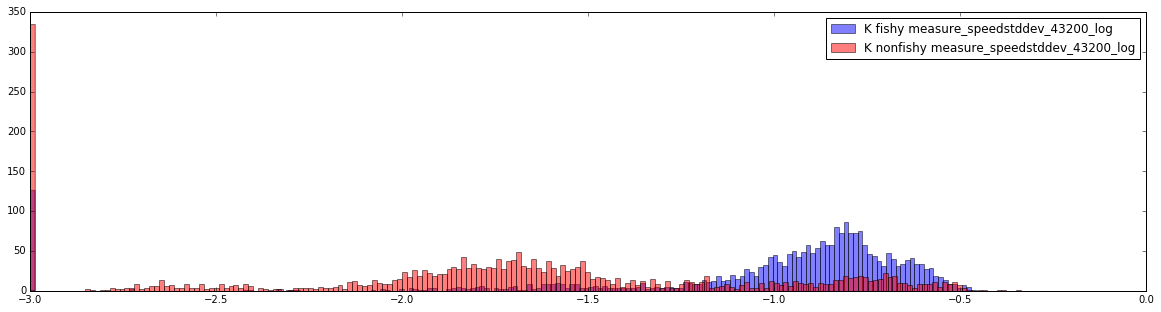

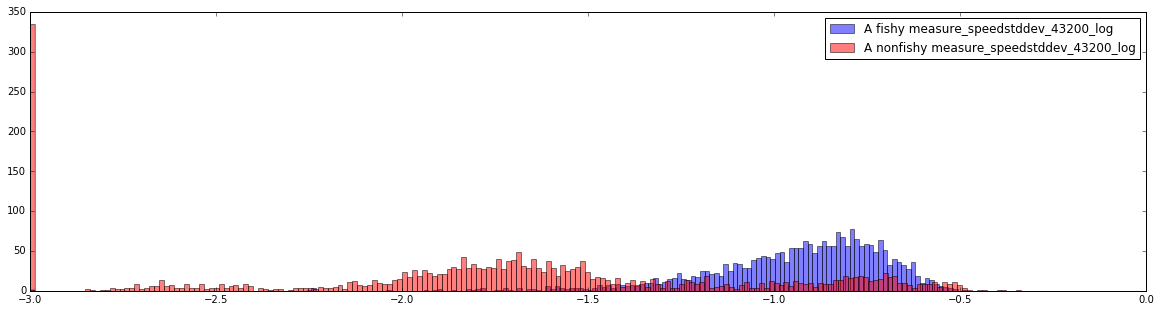

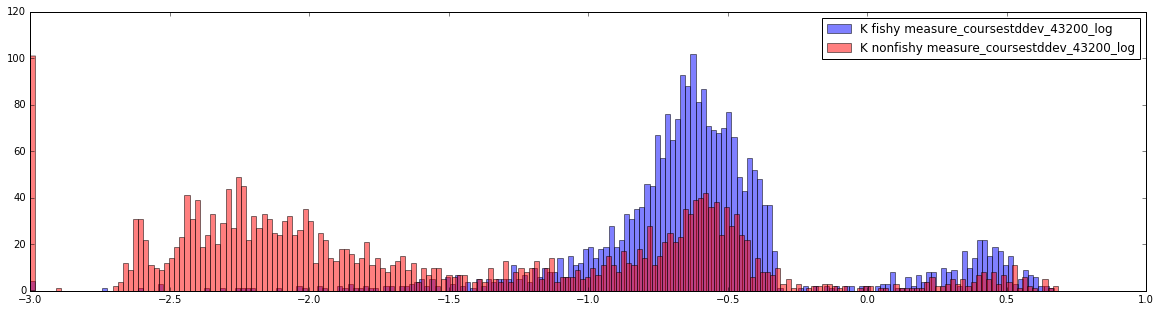

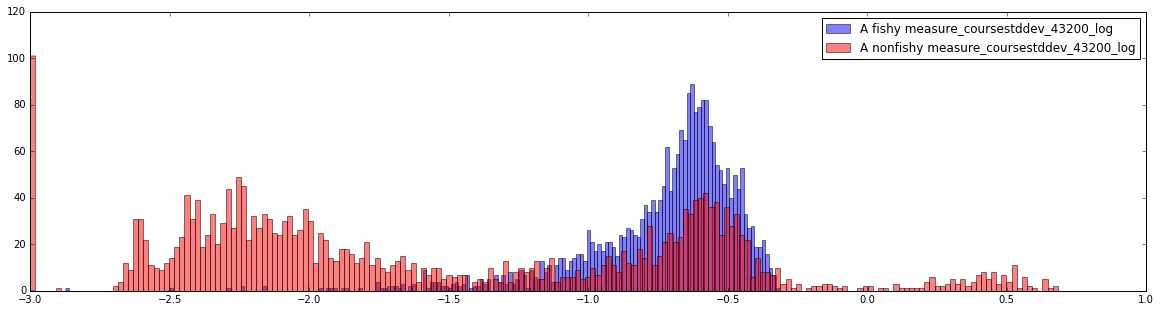

In [5]:
_x, _xtrain, _xcross, _xtest = load_dataset('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.123317796866, cross=0.126646086833
3600: Fitting... Scoring... Calc.err... train=0.123445707408, cross=0.126700064915
10800: Fitting... Scoring... Calc.err... train=0.123443968576, cross=0.127415989182
21600: Fitting... Scoring... Calc.err... train=0.126078542909, cross=0.130651754701
43200: Fitting... Scoring... Calc.err... train=0.140549228621, cross=0.143439755474
86400: Fitting... Scoring... Calc.err... train=0.155125485749, cross=0.157573953996


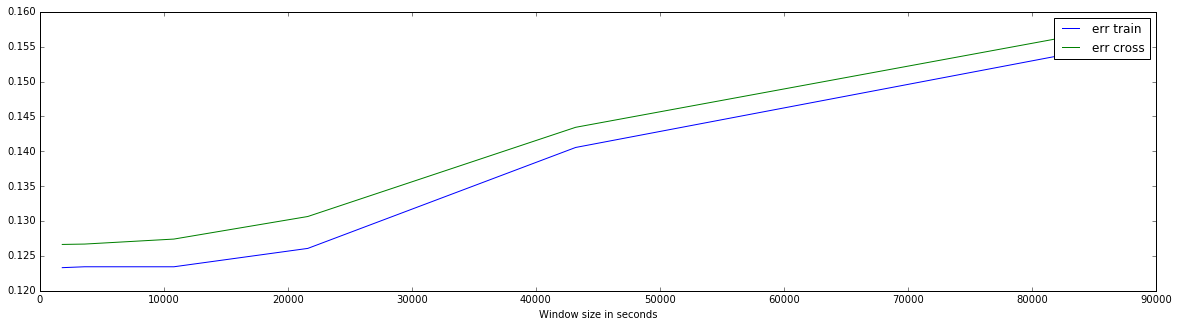

Best window size: 1800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.207492085496, cross=0.209982350431
3: Fitting... Scoring... Calc.err... train=0.137783338055, cross=0.141898975209
4: Fitting... Scoring... Calc.err... train=0.123317796866, cross=0.126646086833
5: Fitting... Scoring... Calc.err... train=0.119839366377, cross=0.122994502825
6: Fitting... Scoring... Calc.err... train=0.119593629306, cross=0.122786564809
7: Fitting... Scoring... Calc.err... train=0.500710863767, cross=0.495301232952
8: Fitting... Scoring... Calc.err... train=0.451887017777, cross=0.4540296888
9: Fitting... Scoring... Calc.err... train=0.500775739146, cross=0.49538009851


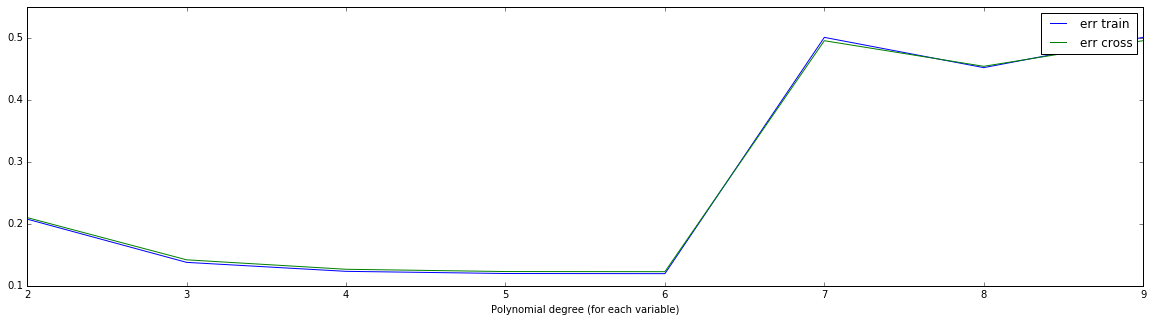

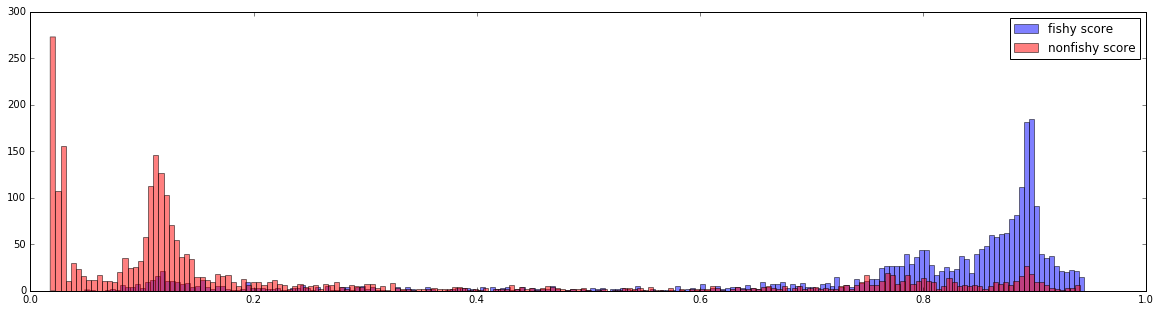

Squared numerical error: 0.128111572458
Error (overlap): 32.24%
False positives given cutoff at 0.5: 36.9426751592%


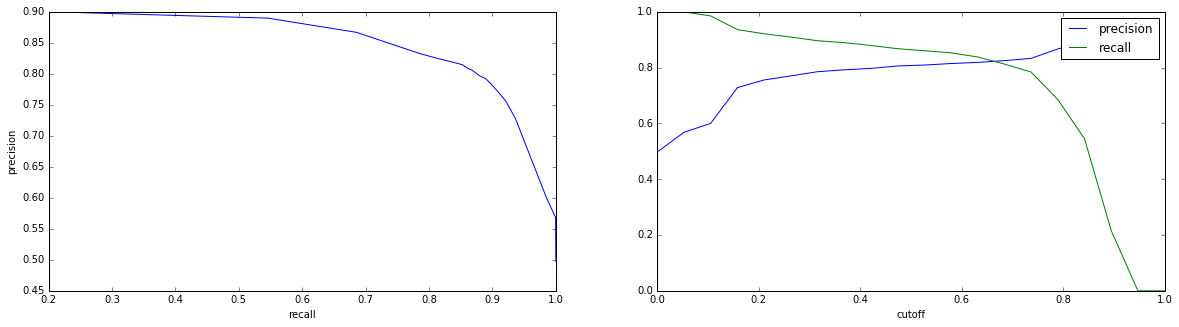

Score window: 1800
Score polynomial: [ -5.69667825e+00   6.00561837e+01  -2.26633077e+02   3.62771113e+02
  -1.91895662e+02  -5.69667816e+00  -1.23859512e+01  -8.28277208e+00
  -2.38629565e+00  -2.52045172e-01  -5.69667852e+00  -9.11612938e+00
  -9.12112872e+00  -3.54305263e+00  -4.77641080e-01]


In [6]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_trawl.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.131149753535, cross=0.130113149279
3600: Fitting... Scoring... Calc.err... train=0.131384965736, cross=0.129081763726
10800: Fitting... Scoring... Calc.err... train=0.141263331764, cross=0.138049381102
21600: Fitting... Scoring... Calc.err... train=0.145413405054, cross=0.145488833669
43200: Fitting... Scoring... Calc.err... train=0.17892852419, cross=0.179802022763
86400: Fitting... Scoring... Calc.err... train=0.196434963575, cross=0.197110853778


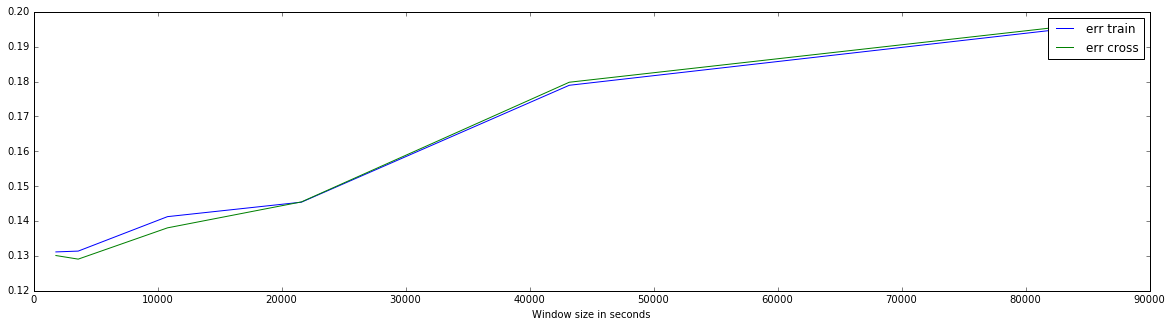

Best window size: 3600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.138720776893, cross=0.136001920082
3: Fitting... Scoring... Calc.err... train=0.137085917222, cross=0.134603860915
4: Fitting... Scoring... Calc.err... train=0.131384965736, cross=0.129081763726
5: Fitting... Scoring... Calc.err... train=0.123306248265, cross=0.122734382853
6: Fitting... Scoring... Calc.err... train=0.120674920736, cross=0.120188024091
7: Fitting... Scoring... Calc.err... train=0.506817142394, cross=0.490532041364
8: Fitting... Scoring... Calc.err... train=0.123126110717, cross=0.121806942865
9: Fitting... Scoring... Calc.err... train=0.506880659048, cross=0.490577168735


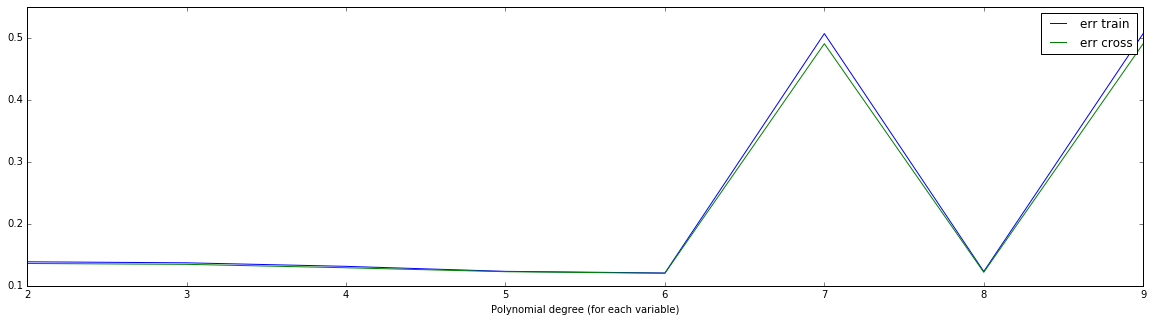

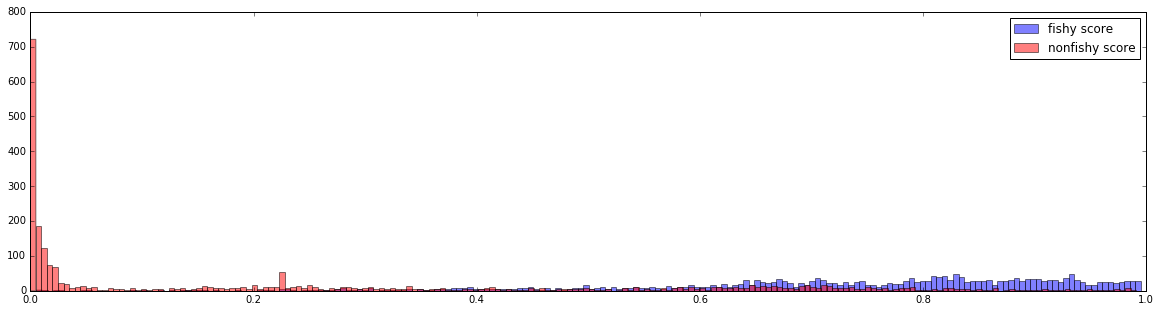

Squared numerical error: 0.120972486179
Error (overlap): 31.72%
False positives given cutoff at 0.5: 41.3986013986%


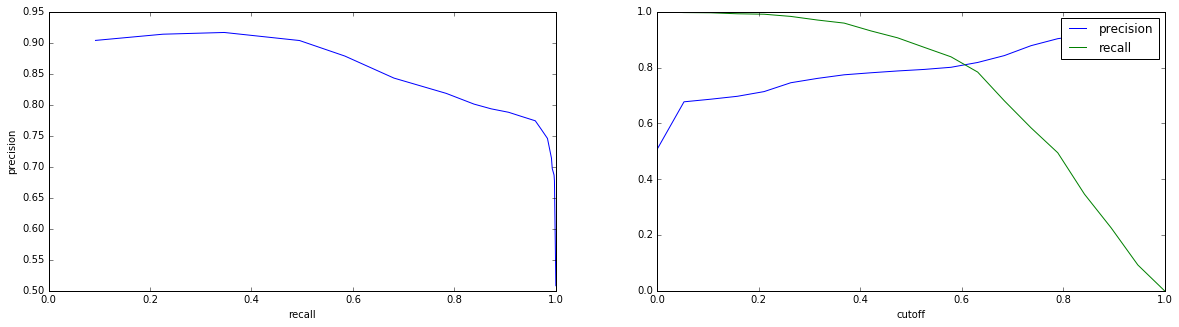

Score window: 3600
Score polynomial: [  -6.0226431   179.97953944 -353.46716136  104.46637064  341.2532636
 -240.90794577   -6.02264312   17.62765617    7.45636281   -2.26562134
   -2.31567451   -0.4102972    -6.02264312   14.77604695   29.91177494
   24.44161656    8.45558454    1.03655964]


In [7]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_ps.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 6, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())